In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

from signals import (
    compute_ttm_sbc_and_repurchase,
    compute_market_cap,
    compute_net_dilution,
    generate_signals
)

from backtest import (
    calculate_strategy_returns,
    get_sp500_data,
    plot_positions,
    plot_performance_comparison
)

In [2]:
tickers = [
    "LYFT",
    "UBER",
    "SNOW",
    "CRM",
    "PINS",
    "SNAP"
]

## Generate trading signals

In [3]:
def generate_trading_positions(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df = compute_ttm_sbc_and_repurchase(df)
    df = compute_market_cap(df)
    df = compute_net_dilution(df)
    df = generate_signals(df)
    df = df.dropna(subset=['closing_price'])

    return df

## Visualize strategy

Processing LYFT backtest...


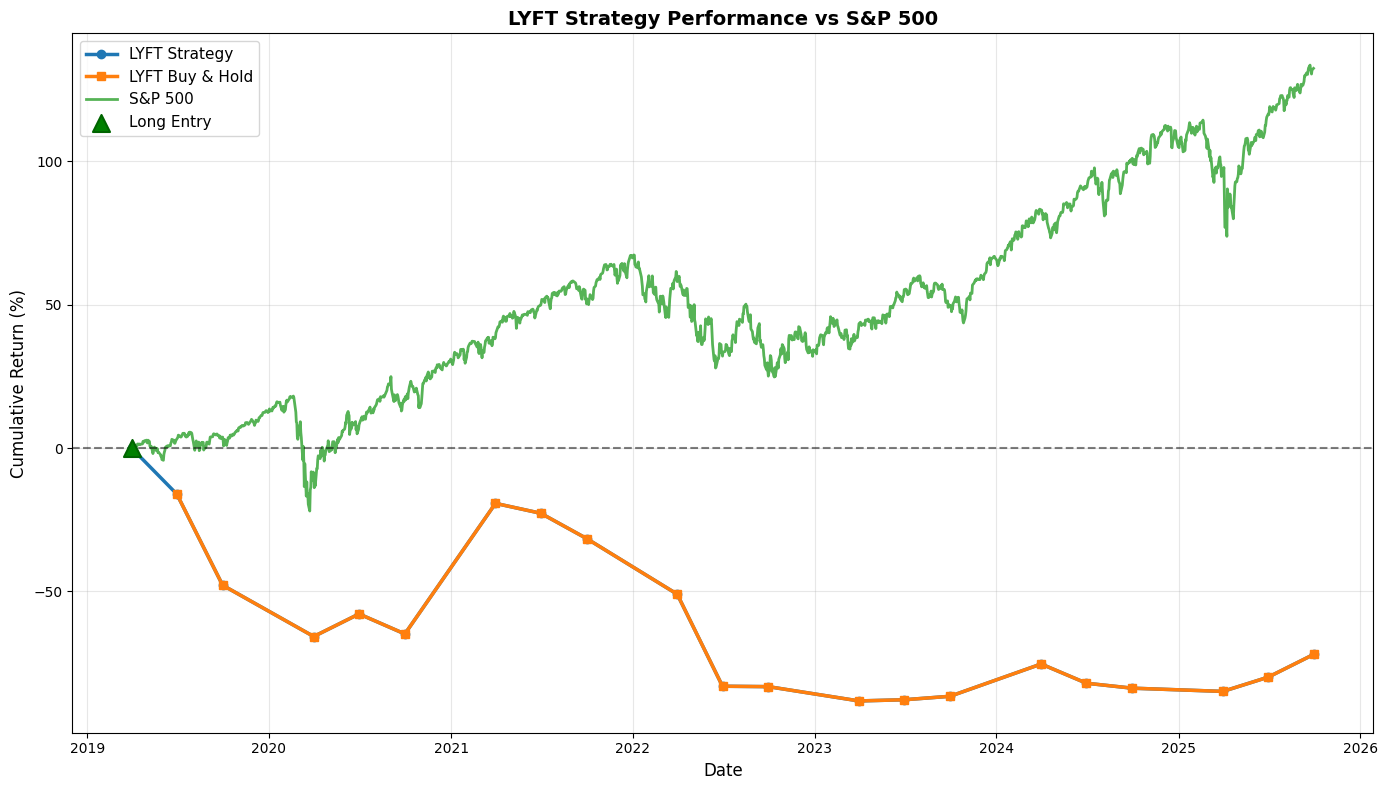

Processing UBER backtest...


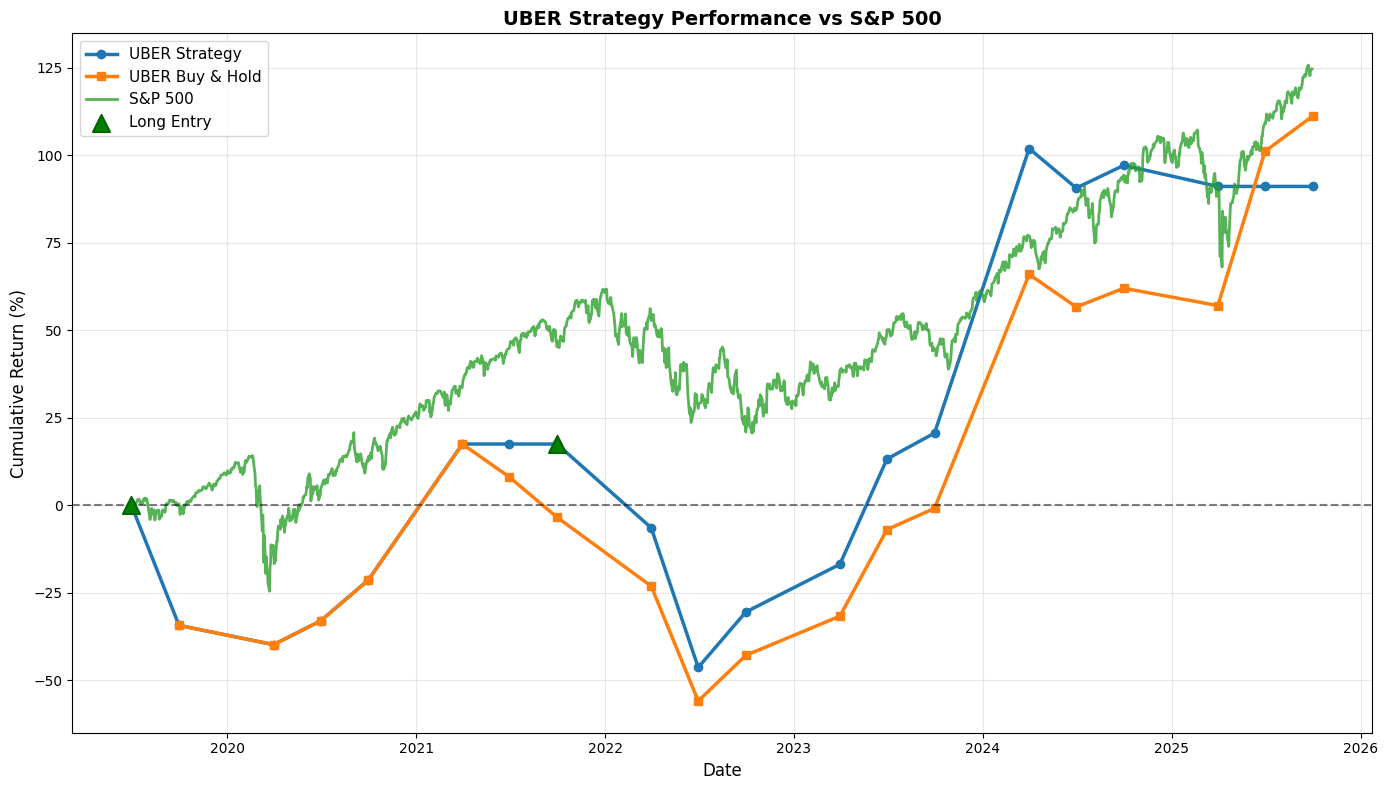

Processing SNOW backtest...


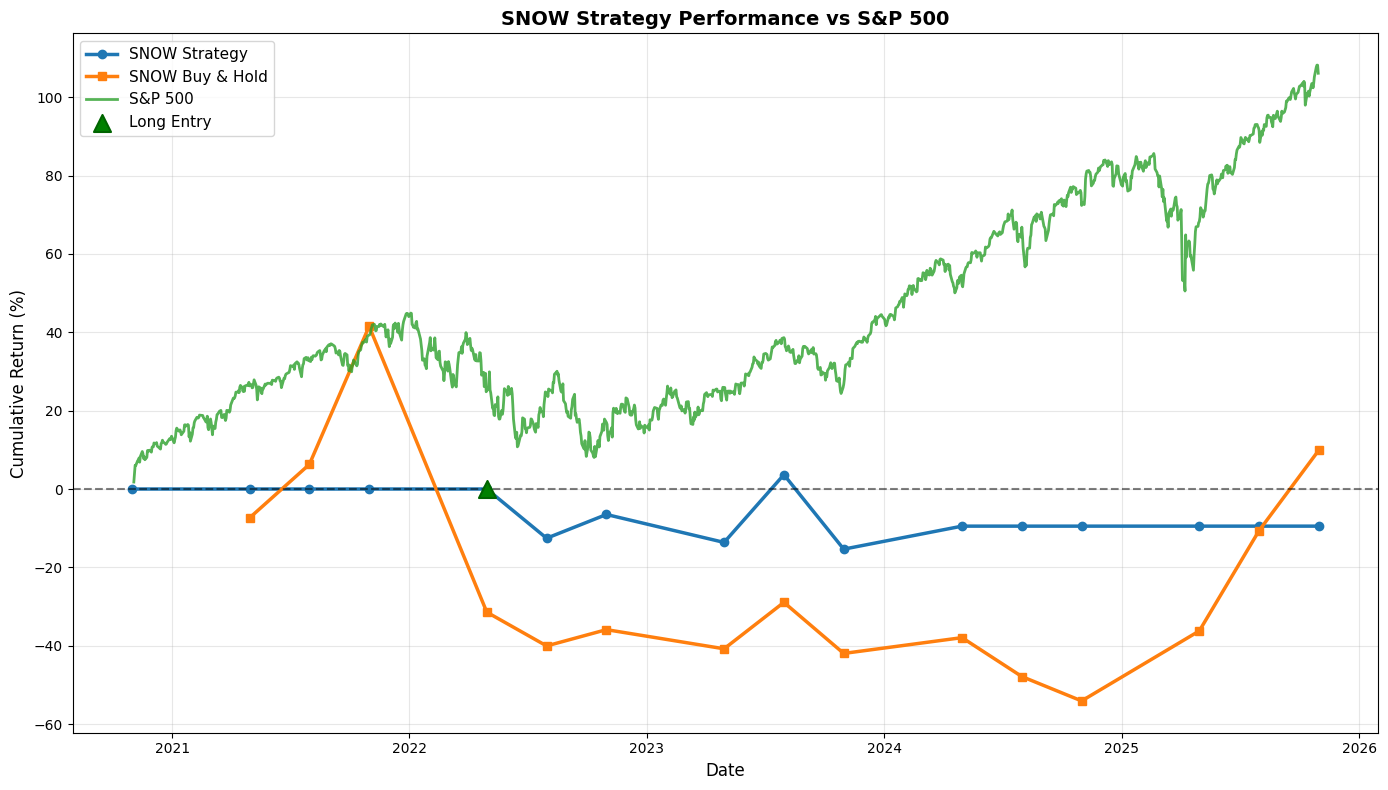

Processing CRM backtest...


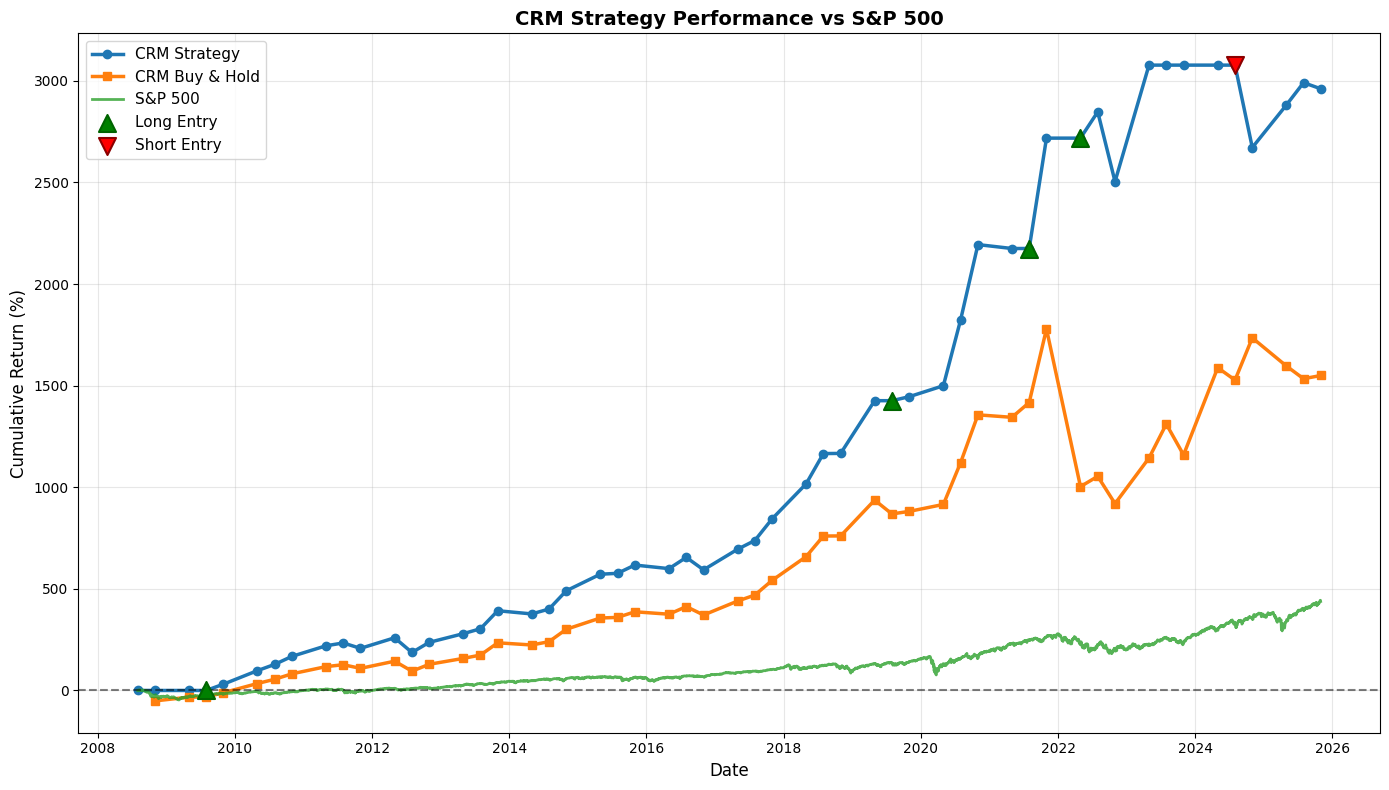

Processing PINS backtest...


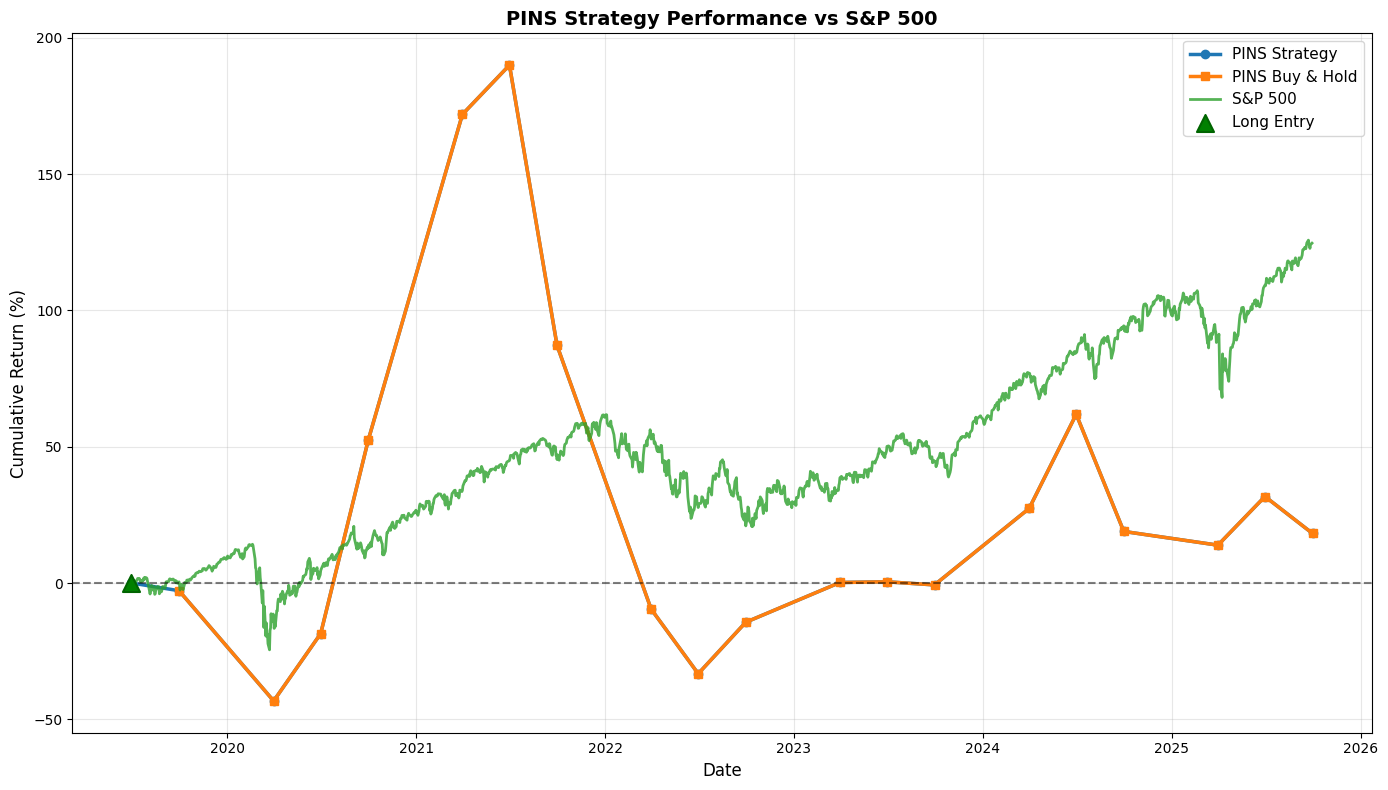

Processing SNAP backtest...


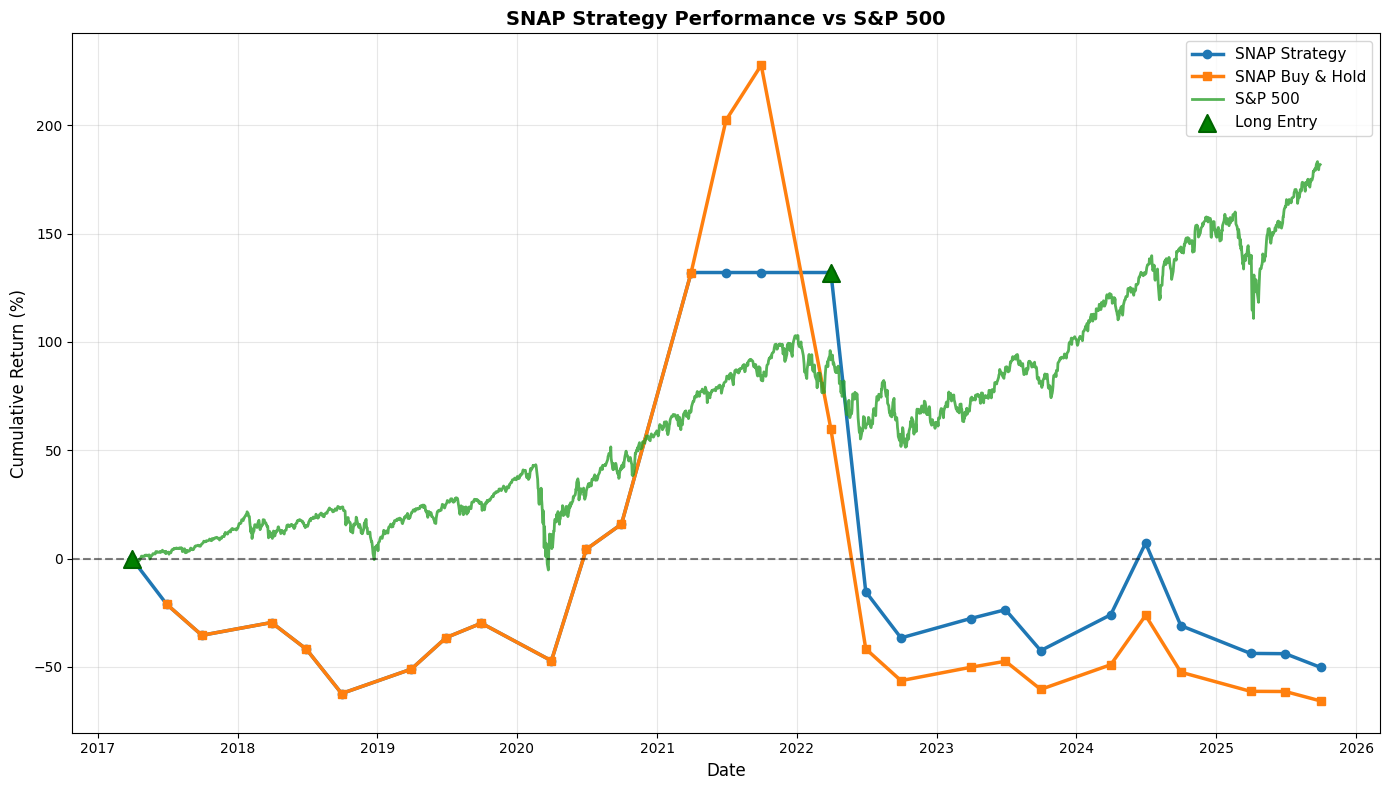

In [4]:
for ticker in tickers:
    df = pd.read_csv(f"../data/{ticker}.csv")

    df = generate_trading_positions(df)

    print(f"Processing {ticker} backtest...")
    backtest = calculate_strategy_returns(df, f"{ticker}")
    start = backtest['date'].min()
    end = backtest['date'].max()
    sp500 = get_sp500_data(start, end)

    # plot_positions(backtest, f"{ticker}")
    fig = plot_performance_comparison(backtest, sp500, f"{ticker}")
    fig.savefig(f"charts/{ticker}.png", dpi=300, bbox_inches='tight')